In [49]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
import math


In [50]:
env=gym.make("Taxi-v3")
env.reset()

(466, {'prob': 1.0, 'action_mask': array([0, 1, 1, 0, 0, 0], dtype=int8)})

In [51]:
num_rows=env.observation_space.n#500
num_columns=env.action_space.n#6

qtable=np.zeros((num_rows,num_columns))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [76]:
episodes=2000
iterations=40
alpha=0.5
d=1


minimum=-800

In [77]:
qtable=np.zeros((num_rows,num_columns))
avgr=[0]*iterations
for iter in range(iterations):
    
    numvis=np.zeros((num_rows,num_columns))
    cumulative_reward=np.zeros((num_rows,num_columns))
    qtabletemp=qtable


    rewa=[0]*episodes
    for epi in range (episodes):
        state,inf=env.reset()
        state=discrete(state)
        done = False
        rew=[0]*200
        obs=[0]*200
        act=[0]*200
        ep=1/(iter+1)
        stepno=0

        while not done:
            if np.random.uniform(0,1)<ep:
                action=env.action_space.sample()
            elif np.max(qtable[state])>minimum:
                action=np.argmax(qtable[state])
            else:
                action=env.action_space.sample()
            obs[stepno]=state
            act[stepno]=action
            newstate,reward,term,trunc,info=env.step(action)
            rewa[epi]+=reward
            for i in range(stepno+1):
                rew[i]+=reward

            done =trunc or term
            avgr[iter]+=reward
            state=newstate
            stepno+=1
            #print(reward)
            #print(state)
        for i in range(stepno):
            numvis[obs[i],act[i]]+=1
            cumulative_reward[obs[i],act[i]]+=rew[i]
            qtabletemp[obs[i],act[i]]=qtabletemp[obs[i],act[i]]*(1-alpha)+alpha*cumulative_reward[obs[i],act[i]]/numvis[obs[i],act[i]]
    avgr[iter]=avgr[iter]/episodes

    #for i in range(500):
     #   print(qtable[i])

    #print(rewa)
print(avgr)

for i in range(500):
        print(qtable[i])



[-766.8055, -265.277, -73.8815, -145.4315, -158.162, -83.954, -157.529, -192.3735, -177.0605, -196.14, -181.747, -260.0785, -243.7535, -209.388, -163.235, -165.29, -144.4855, -191.11, -216.702, -216.46, -208.9015, -227.0335, -241.5305, -223.248, -228.36, -273.3505, -232.332, -201.639, -183.704, -261.8155, -224.9355, -196.882, -156.738, -149.202, -162.55, -125.2665, -114.916, -101.6465, -70.542, -163.827]
[0. 0. 0. 0. 0. 0.]
[-179.50931778 -107.02599035 -136.37344828 -816.52903004 -275.66819303
 -897.72685359]
[-117.53543847    6.73197072  -19.5101871   -43.49747037   14.40781269
    4.63004563]
[ -27.17977667  -32.70386878 -361.11842166   -7.37265277   11.29116589
 -145.77791488]
[-133.1678256  -132.21605623 -124.72219907 -127.92138096 -226.7422184
 -740.00128105]
[0. 0. 0. 0. 0. 0.]
[  -2.7058638   -58.         -119.15941825 -155.32751303 -128.77344726
 -173.85841619]
[  -58.8011561   -306.4385985      4.8503006   -570.38272823
  -312.79439568 -1185.75156789]
[   8.53165353 -174.26421

In [79]:
avgr.sort()
print(avgr)

[-766.8055, -273.3505, -265.277, -261.8155, -260.0785, -243.7535, -241.5305, -232.332, -228.36, -227.0335, -224.9355, -223.248, -216.702, -216.46, -209.388, -208.9015, -201.639, -196.882, -196.14, -192.3735, -191.11, -183.704, -181.747, -177.0605, -165.29, -163.827, -163.235, -162.55, -158.162, -157.529, -156.738, -149.202, -145.4315, -144.4855, -125.2665, -114.916, -101.6465, -83.954, -73.8815, -70.542]


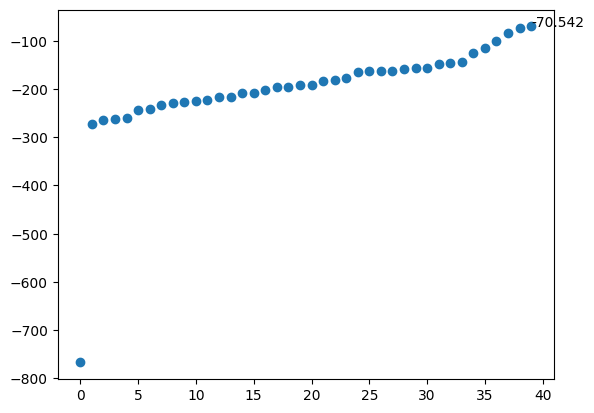

In [86]:
x=[i for i in range (iterations)]
plt.scatter(x,avgr)

plt.annotate(avgr[iterations-1],(x[iterations-1],avgr[iterations-1]))
plt.show()